In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [3]:
df_train = pd.read_csv("train_prepared.csv")

In [4]:
del df_train["kfold"]

In [5]:
df_train_int_column = [column for column in df_train.columns if df_train[column].dtype.name == "int" or "float"]
df_columns = df_train_int_column[:23]
df_columns.append("Transported")

In [6]:
df_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Alone,RoomService_missing,...,GroupSize_8,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,Transported
0,0.0,0.702095,0.0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-0.333233,0.0,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,2.013510,1.0,-0.272527,1.934922,-0.287317,5.634034,-0.223327,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.287964,0.0,-0.337025,0.511931,0.326250,2.655075,-0.097634,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.885407,0.0,0.117466,-0.240833,-0.037590,0.223344,-0.264352,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [7]:
df_train["Transported"] = df_train["Transported"].replace({True:1.0,False:0.0})

In [8]:
df_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Alone,RoomService_missing,...,GroupSize_8,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,Transported
0,0.0,0.702095,0.0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-0.333233,0.0,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,2.013510,1.0,-0.272527,1.934922,-0.287317,5.634034,-0.223327,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.287964,0.0,-0.337025,0.511931,0.326250,2.655075,-0.097634,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.885407,0.0,0.117466,-0.240833,-0.037590,0.223344,-0.264352,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   float64
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   float64
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Alone                      8693 non-null   float64
 9   RoomService_missing        8693 non-null   float64
 10  FoodCourt_missing          8693 non-null   float64
 11  ShoppingMall_missing       8693 non-null   float64
 12  Cabin_missing              8693 non-null   float64
 13  VIP_missing                8693 non-null   float

In [10]:
df = df_train[df_columns]
df.head()
cols = ["CryoSleep","Age","Alone","Transported","TotalExpense"]
df_clip = df[cols]
df_clip.shape

(8693, 5)

In [12]:
df_clip_ = df_clip.iloc[:1000,:]
df_clip_.shape

(1000, 5)

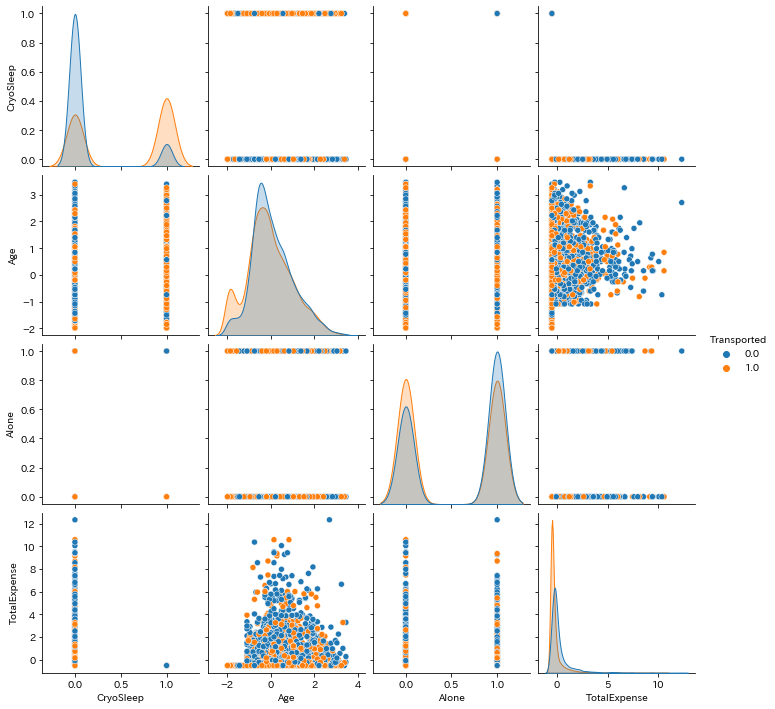

In [13]:
sns.pairplot(df_clip,hue="Transported")
plt.show()